# 🏠 Simple House Price Prediction

**Goal**: Predict house prices using machine learning

**What we'll learn**:
- How to load and explore data
- How to train a machine learning model
- How to make predictions
- How to check if our model is good

## Step 1: Import Libraries
These are tools that help us work with data and create models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## Step 2: Load the Data
Let's look at our house price dataset

In [3]:
# Load the dataset
df = pd.read_csv('housing_price_dataset.csv')

print(f"📊 Dataset loaded! We have {len(df)} houses")
print(f"📋 Columns: {list(df.columns)}")

# Show first 5 houses
print("\n🏠 First 5 houses:")
df.head()

📊 Dataset loaded! We have 5000 houses
📋 Columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']

🏠 First 5 houses:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Step 3: Explore the Data
Let's understand what we're working with

In [4]:
# Basic statistics
print("📈 Basic Statistics:")
print(df.describe())

# Check for missing data
print(f"\n❓ Missing values: {df.isnull().sum().sum()}")

# Price range
print(f"\n💰 Price Range:")
print(f"   Cheapest house: ${df['Price'].min():,.0f}")
print(f"   Most expensive: ${df['Price'].max():,.0f}")
print(f"   Average price:  ${df['Price'].mean():,.0f}")

📈 Basic Statistics:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2

## Step 4: Prepare the Data
Choose which features (columns) to use for prediction

In [5]:
# Choose features (input) and target (output)
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
           'Avg. Area Number of Bedrooms', 'Area Population']

X = df[features]  # Features (what we use to predict)
y = df['Price']   # Target (what we want to predict)

print(f"🎯 Features we'll use: {features}")
print(f"🏷️  Target: Price")
print(f"📊 Data shape: {X.shape}")

🎯 Features we'll use: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
🏷️  Target: Price
📊 Data shape: (5000, 5)


## Step 5: Split the Data
Divide data into training (to teach the model) and testing (to check how good it is)

In [6]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📚 Training data: {len(X_train)} houses")
print(f"🧪 Testing data:  {len(X_test)} houses")
print(f"✅ Data split successfully!")

📚 Training data: 4000 houses
🧪 Testing data:  1000 houses
✅ Data split successfully!


## Step 6: Train the Model
Teach the computer to predict house prices

In [7]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("🤖 Model trained successfully!")
print("🎓 The computer has learned to predict house prices!")

🤖 Model trained successfully!
🎓 The computer has learned to predict house prices!


## Step 7: Make Predictions
Use our trained model to predict prices

In [8]:
# Make predictions on test data
y_pred = model.predict(X_test)

print(f"🔮 Made predictions for {len(y_pred)} houses!")
print(f"📊 Prediction range: ${y_pred.min():,.0f} to ${y_pred.max():,.0f}")

🔮 Made predictions for 1000 houses!
📊 Prediction range: $258,046 to $2,474,726


## Step 8: Check Model Performance
How good are our predictions?

In [9]:
# Calculate accuracy metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"   R² Score: {r2:.3f} (closer to 1.0 is better)")
print(f"   Average Error: ${mae:,.0f}")

# Interpret the results
accuracy_percent = r2 * 100
print(f"\n💡 What this means:")
print(f"   Our model explains {accuracy_percent:.1f}% of price variation")
print(f"   On average, predictions are off by ${mae:,.0f}")

if r2 > 0.8:
    print("🎉 Excellent model!")
elif r2 > 0.7:
    print("👍 Good model!")
elif r2 > 0.6:
    print("👌 Decent model")
else:
    print("⚠️ Model needs improvement")

📊 Model Performance:
   R² Score: 0.918 (closer to 1.0 is better)
   Average Error: $80,879

💡 What this means:
   Our model explains 91.8% of price variation
   On average, predictions are off by $80,879
🎉 Excellent model!


## Step 9: Visualize Results
Let's see how well our predictions match reality

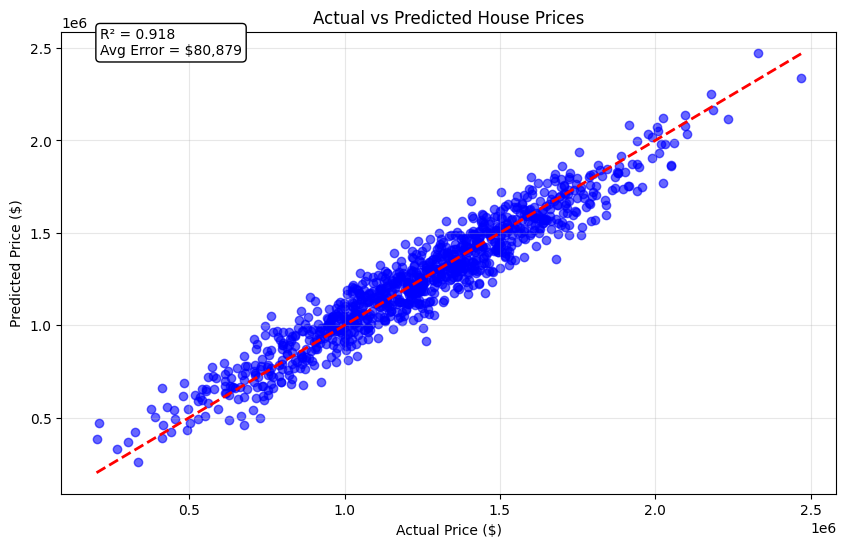

📈 The red line shows perfect predictions
📊 Points closer to the red line = better predictions


In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True, alpha=0.3)

# Add text with performance
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nAvg Error = ${mae:,.0f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white'))

plt.show()

print("📈 The red line shows perfect predictions")
print("📊 Points closer to the red line = better predictions")

## Step 10: Example Predictions
Let's see some specific examples

In [11]:
# Show 5 example predictions
print("🏠 Example Predictions:")
print("=" * 50)

for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    error = abs(actual - predicted)
    
    print(f"\nHouse {i+1}:")
    print(f"  Actual Price:    ${actual:,.0f}")
    print(f"  Predicted Price: ${predicted:,.0f}")
    print(f"  Error:           ${error:,.0f}")
    
    if error < mae:
        print(f"  ✅ Better than average prediction!")
    else:
        print(f"  ⚠️ Worse than average prediction")

🏠 Example Predictions:

House 1:
  Actual Price:    $1,339,096
  Predicted Price: $1,308,588
  Error:           $30,508
  ✅ Better than average prediction!

House 2:
  Actual Price:    $1,251,794
  Predicted Price: $1,237,037
  Error:           $14,757
  ✅ Better than average prediction!

House 3:
  Actual Price:    $1,340,095
  Predicted Price: $1,243,429
  Error:           $96,666
  ⚠️ Worse than average prediction

House 4:
  Actual Price:    $1,431,508
  Predicted Price: $1,228,900
  Error:           $202,607
  ⚠️ Worse than average prediction

House 5:
  Actual Price:    $1,042,374
  Predicted Price: $1,063,321
  Error:           $20,947
  ✅ Better than average prediction!


## Step 11: Feature Importance
Which features matter most for predicting price?

In [12]:
# Get feature coefficients (how much each feature affects price)
coefficients = model.coef_

print("🔍 Feature Importance:")
print("=" * 40)

for feature, coef in zip(features, coefficients):
    direction = "increases" if coef > 0 else "decreases"
    strength = "strongly" if abs(coef) > 50000 else "moderately" if abs(coef) > 10000 else "slightly"
    
    print(f"📊 {feature}:")
    print(f"   {strength} {direction} price (coefficient: {coef:,.0f})")
    print()

🔍 Feature Importance:
📊 Avg. Area Income:
   slightly increases price (coefficient: 22)

📊 Avg. Area House Age:
   strongly increases price (coefficient: 164,666)

📊 Avg. Area Number of Rooms:
   strongly increases price (coefficient: 119,624)

📊 Avg. Area Number of Bedrooms:
   slightly increases price (coefficient: 2,440)

📊 Area Population:
   slightly increases price (coefficient: 15)



## 🎯 Summary

**What we accomplished:**
1. ✅ Loaded house price data
2. ✅ Prepared features for machine learning
3. ✅ Trained a linear regression model
4. ✅ Made price predictions
5. ✅ Evaluated model performance
6. ✅ Visualized results

**Key takeaways:**
- Machine learning can predict house prices with good accuracy
- Different features have different impacts on price
- We can measure and visualize model performance
- Simple models can be very effective!